In [145]:
## YAY! starting a new clean environmen fixed the dependency issues :))
 
#pip install seaborn
#pip install scikit-learn


                    #maybe ignore these versions?? i started a clean environment and just pip installed seaborn 
                    # pip install --upgrade matplotlib==3.4.3
                    # pip install pandas==1.5.3 seaborn==0.11.2


#pip install pandas
#pip install seaborn
#pip install scikit-learn

# import pandas as pd
# import numpy as np
# # import seaborn as sns 
# # import matplotlib.pyplot as plt
# # from statannotations.Annotator import Annotator
# from sklearn.preprocessing import StandardScalar

import seaborn as sns 
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d  # noqa: F401
import numpy as np
from sklearn import datasets, decomposition
import pandas as pd

# import data

In [146]:
#load in csv

df = pd.read_csv('/Users/kristinachan/Analysis/2024-08-02_longcovid_interstate/LC_household_pulse_for_BV_8.csv')
date_columns = df.filter(like="/2")
date_columns = date_columns.columns.tolist()
# list = df_dates.columns
# list
#option to make the index the state, may be more useful as the column for now

In [147]:
df.columns

Index(['State', 'Jun 24 Value', 'Jun 24 Low CI', 'Jun 24 High CI', 'Urban',
       'Rural', 'Conservative', 'Moderate', 'Liberal', 'Political Don't know',
       'Political sum', 'Below Poverty Line', 'White', 'Black', 'AI_AN',
       'Asian', 'NHPI', 'Hispanic', 'Multiple',
       'Percent of total pop with at least one dose',
       'Percent of pop with an updated (bivalent) booster dose',
       'Percent of 5+ pop with a completed primary series',
       'Percent of 12+ pop with at least one dose',
       'Percent of 18+ pop with a completed primary series',
       'Percent of 65+ pop with a completed primary series', 'Paid sick leave',
       'Eviction moratoria duration', '7/11/22', '8/8/22', '9/26/22',
       '10/17/22', '11/14/22', '12/19/22', '1/16/23', '2/13/23', '3/13/23',
       '4/10/23', '5/8/23', '6/19/23', '7/10/23', '8/7/23', '9/4/23',
       '10/2/23', '10/30/23', '2/5/24', '3/4/24', '4/1/24', '4/29/24',
       '5/27/24', '6/24/24', 'Avg'],
      dtype='object')

In [148]:
df = df.rename(columns={
    'State': 'state',
    'Avg': 'avg_long_covid_rate',
    'Paid sick leave': 'paid_sick_leave',
    'Below Poverty Line': 'below_poverty_line',
    'White': 'white',
    'Black': 'black',
    'AI_AN': 'ai_an', #american indian alaskan native
    'Asian': 'asian',
    'NHPI': 'nhpi', #native hawaiian and pacific islander
    'Hispanic': 'hispanic',
    'Multiple': 'multi_ethnic',
    'Eviction moratoria duration':'eviction_moratia_duration',
    'Percent of total pop with at least one dose': 'vax_min_one_dose',
    'Percent of pop with an updated (bivalent) booster dose': 'vax_bivalent_booster_dose',
    'Percent of 5+ pop with a completed primary series': 'vax_fiveup_primaryseries',
    'Percent of 12+ pop with at least one dose': 'vax_twelveup_min_one_dose',
    'Percent of 18+ pop with a completed primary series': 'vax_eighteenup_primaryseries',
    'Percent of 65+ pop with a completed primary series': 'vax_sixtyfiveup_primaryseries', 
    
})

df['rural_urban'] = df['Rural']
df['lib_conserv_scale'] = (df['Conservative'] + 0.5 * df['Moderate']) / (df['Conservative'] + df['Moderate'] + df['Liberal']) * 100
df['sick_leave'] = np.where(df['paid_sick_leave'] == 0, 'unpaid', 'paid')

df.head().filter(like='vax')


,vax_min_one_dose,vax_bivalent_booster_dose,vax_fiveup_primaryseries,vax_twelveup_min_one_dose,vax_eighteenup_primaryseries,vax_sixtyfiveup_primaryseries
0,65.1,7.7,56.6,74.2,63.3,85.3
1,73.2,14.2,69.8,82.9,75.9,89.5
2,78.4,15.8,70.2,86.9,75.2,90.8
3,70.1,11.0,60.6,79.5,66.8,84.2
4,85.1,20.6,79.1,94.0,83.9,93.2


In [149]:
# df 
df.columns

Index(['state', 'Jun 24 Value', 'Jun 24 Low CI', 'Jun 24 High CI', 'Urban',
       'Rural', 'Conservative', 'Moderate', 'Liberal', 'Political Don't know',
       'Political sum', 'below_poverty_line', 'white', 'black', 'ai_an',
       'asian', 'nhpi', 'hispanic', 'multi_ethnic', 'vax_min_one_dose',
       'vax_bivalent_booster_dose', 'vax_fiveup_primaryseries',
       'vax_twelveup_min_one_dose', 'vax_eighteenup_primaryseries',
       'vax_sixtyfiveup_primaryseries', 'paid_sick_leave',
       'eviction_moratia_duration', '7/11/22', '8/8/22', '9/26/22', '10/17/22',
       '11/14/22', '12/19/22', '1/16/23', '2/13/23', '3/13/23', '4/10/23',
       '5/8/23', '6/19/23', '7/10/23', '8/7/23', '9/4/23', '10/2/23',
       '10/30/23', '2/5/24', '3/4/24', '4/1/24', '4/29/24', '5/27/24',
       '6/24/24', 'avg_long_covid_rate', 'rural_urban', 'lib_conserv_scale',
       'sick_leave'],
      dtype='object')

In [150]:
features = ['rural_urban', 'lib_conserv_scale',
       'below_poverty_line', 'white', 'black', 'ai_an',
       'asian', 'nhpi', 'hispanic', 'multi_ethnic', 'vax_min_one_dose',
       'vax_bivalent_booster_dose', 'vax_fiveup_primaryseries',
       'vax_twelveup_min_one_dose', 'vax_eighteenup_primaryseries',
       'vax_sixtyfiveup_primaryseries', 'paid_sick_leave',
       'eviction_moratia_duration',] #currently have 18 features

pca_df = df[['rural_urban', 'lib_conserv_scale',
       'below_poverty_line', 'white', 'black', 'ai_an',
       'asian', 'nhpi', 'hispanic', 'multi_ethnic', 'vax_min_one_dose',
       'vax_bivalent_booster_dose', 'vax_fiveup_primaryseries',
       'vax_twelveup_min_one_dose', 'vax_eighteenup_primaryseries',
       'vax_sixtyfiveup_primaryseries', 'paid_sick_leave',
       'eviction_moratia_duration', 
       'state', 'sick_leave', 'avg_long_covid_rate',]]

# HERE: option to create more pca_df columns that you want to color by later 




#### SELECT which states to drop (if any) -- comment out lines of code you do not want to drop

In [151]:
pca_df = pca_df.drop(df[df['state'] == 'United States'].index) #this column is for all of the united states and has some nan values
# pca_df = pca_df.drop(pca_df[pca_df['state'] == 'District of Columbia'].index)
pca_df.shape #.head()

(51, 21)

# PCA Analysis 

##### Normalize the feature data

In [152]:
from sklearn.preprocessing import StandardScaler

x = pca_df.loc[:, features].values #takes in the entire pca table, and then selects the features we care about for the pca analysis itself
x = StandardScaler().fit_transform(x) #normalize the values of the selected features
x.shape
np.mean(x), np.std(x) #check to see if normalized data normalized properly -- mean of zero, sd of one
feat_cols = ['feature'+str(i) for i in range(x.shape[1])] #change the name of the columns
normalized_pca_df = pd.DataFrame(x, columns=feat_cols)
normalized_pca_df.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17
46,-0.174825,0.497376,-0.598812,-0.416559,0.767528,-0.442661,0.483031,-0.210281,-0.228840,-0.013551,1.427802,2.486316,1.684654,1.044633,1.523789,0.805231,-0.676123,-0.528189
47,-0.694210,-1.093873,-0.858564,-0.087172,-0.691591,-0.106194,1.052528,0.304374,0.091727,0.547859,1.085499,0.444587,0.847076,1.044633,0.812481,0.805231,1.479020,0.866340
48,1.889395,1.425605,2.035816,1.528166,-0.745745,-0.459616,-0.707080,-0.248401,-0.963939,-0.678902,0.558169,1.227506,0.786528,0.948096,0.835062,0.805231,-0.676123,-0.693789
49,0.391170,0.638268,-0.598812,0.841575,-0.485989,-0.221814,-0.276212,-0.235721,-0.454439,-0.514568,-1.107086,-0.983088,-0.979450,-1.296386,-1.039178,-1.460736,-0.676123,-0.682168
50,0.730768,0.899560,-0.264845,1.025942,-0.995539,0.188160,-0.683436,-0.212358,-0.168892,-0.365322,-0.394727,0.736263,-0.061141,-0.391353,-0.056896,0.805231,-0.676123,-0.856484


In [153]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4) #4
PCs = pca.fit_transform(x) #get PCs -- note i used fit_transform and not just fit..
PCs_df = pd.DataFrame(data = PCs, columns = ['PC1', 'PC2', 'PC3', 'PC4']) #put PCs into df
PCs_df.tail()

,PC1,PC2,PC3,PC4
46,2.573682,1.002736,-0.532094,-1.075553
47,3.189022,0.139778,-0.274229,0.122817
48,-0.516849,2.283849,-1.387897,-0.406930
49,-2.955388,0.031603,-0.493300,-0.202480
50,-0.989153,1.466343,-1.441803,0.463492


In [154]:
print('EXPLAINED VARIABILITY PER PRINCIPAL COMPONENT: {}'.format(pca.explained_variance_ratio_))

EXPLAINED VARIABILITY PER PRINCIPAL COMPONENT: [0.43667753 0.16063101 0.11894381 0.07711114]


### visualize top 4 PCs

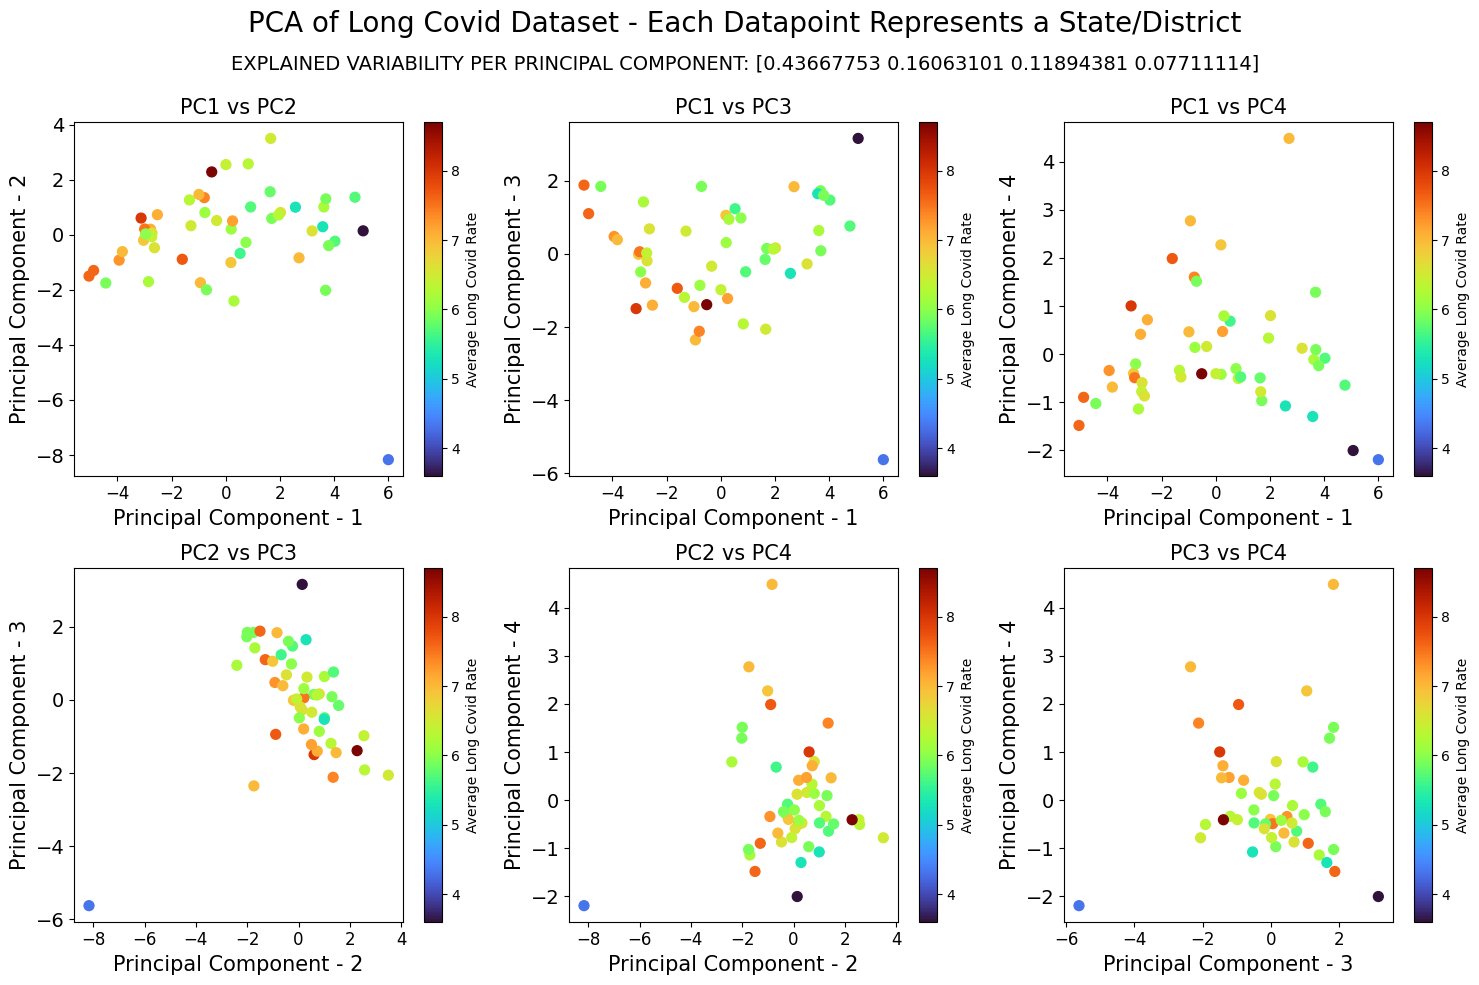

In [168]:
import matplotlib.pyplot as plt
import itertools

# List of principal components to consider
pcs = [1, 2, 3, 4]

# Create all combinations of the PCs taken two at a time
combinations = list(itertools.combinations(pcs, 2))

# Set up the figure for subplots
plt.figure(figsize=(15, 10))
plt.suptitle("PCA of Long Covid Dataset - Each Datapoint Represents a State/District", fontsize=20)
plt.figtext(0.5, 0.92, #left-right, up-down location
            'EXPLAINED VARIABILITY PER PRINCIPAL COMPONENT: {}'.format(pca.explained_variance_ratio_), 
            fontsize=14, ha='center')

# Loop through each combination of PCs
for i, (pc_a, pc_b) in enumerate(combinations, start=1):
    plt.subplot(2, 3, i)  # Create a subplot in a 2x3 grid
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=14)
    plt.xlabel(f'Principal Component - {pc_a}', fontsize=15)
    plt.ylabel(f'Principal Component - {pc_b}', fontsize=15)
    plt.title(f'PC{pc_a} vs PC{pc_b}', fontsize=15)

    # Scatter plot for the current pair of PCs
    sc = plt.scatter(PCs_df[f'PC{pc_a}'], 
                     PCs_df[f'PC{pc_b}'], 
                     c=pca_df['avg_long_covid_rate'], 
                     cmap='turbo', #'plasma', #'turbo', #viridis
                     s=50)
    plt.colorbar(sc, label='Average Long Covid Rate')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Analyze Feature Loadings (how much do the features play a role in each PC?)

In [179]:
sort_this_column = 'PC2' #edit to PC1, PC2, PC3 depending on which PC you want to see

loadings = pca.components_
PC_loadings_df = pd.DataFrame(loadings.T, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=features)
# sorted_loadings_df = PC_loadings_df.sort_values(by='PC1', ascending=False) #use this if you want sort from pos-->neg without abs value
sorted_loadings_df = PC_loadings_df.reindex(loading_df[f'{sort_this_column}'].abs().sort_values(ascending=False).index)
# sorted_loadings_df[f'{sort_this_column}']
columns = [f'{sort_this_column}', 'PC1', 'PC2', 'PC3', 'PC4'] #EDIT IF YOU WANT TO INCLUDE OTHER PC IN THE DF 
sorted_loadings_df[columns]

,PC2,PC1,PC2,PC3,PC4
white,0.447666,-0.152484,0.447666,-0.275373,-0.075421
multi_ethnic,-0.427349,0.184948,-0.427349,-0.280605,0.011434
nhpi,-0.418208,0.107795,-0.418208,-0.394894,-0.149378
asian,-0.403836,0.208762,-0.403836,-0.196754,-0.161725
vax_bivalent_booster_dose,0.232620,0.273629,0.232620,-0.111315,-0.109621
vax_sixtyfiveup_primaryseries,0.222934,0.275390,0.222934,-0.164152,0.060431
rural_urban,0.204032,-0.215779,0.204032,-0.275879,-0.047062
below_poverty_line,-0.177034,-0.171777,-0.177034,0.260998,0.061515
hispanic,-0.157134,0.124977,-0.157134,0.316154,0.538672
black,-0.130423,-0.051761,-0.130423,0.439933,-0.450580


#### Visualize PCs_df results & color by target

In [157]:
# chosen_pc_a = 1 #x axis
# chosen_pc_b = 4 #y axis

# #you can create a figure panel that plots the graphs for the different combinations of these if you want? 
# #a for loop for this:


# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 10))
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=14)
# plt.xlabel(f'Principal Component - {chosen_pc_a}', fontsize=20)
# plt.ylabel(f'Principal Component - {chosen_pc_b}', fontsize=20)
# plt.title("PCA of Long Covid Dataset", fontsize=20)
# plt.suptitle("Each datapoint represents a state/district")

# # Assuming 'avg_long_covid_rate' is a column in PCs_df
# sc = plt.scatter(PCs_df[f'PC{chosen_pc_a}'], 
#                  PCs_df[f'PC{chosen_pc_b}'], 
#                  c=pca_df['avg_long_covid_rate'], 
#                  cmap='viridis', 
#                  s=50)

# # Add a color bar to show the mapping of colors to avg_long_covid_rate
# plt.colorbar(sc, label='Average Long Covid Rate')

# plt.show()

In [ ]:
# plt.figure()
# plt.figure(figsize=(10,10))
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=14)
# plt.xlabel(f'Principal Component - {chosen_pc_a}',fontsize=20)
# plt.ylabel(f'Principal Component - {chosen_pc_b}',fontsize=20)
# plt.title("Principal Component Analysis of Long Covid Dataset",fontsize=20)
# targets = ['paid', 'unpaid']
# colors = ['r', 'g']
# for target, color in zip(targets,colors):
#     indicesToKeep = pca_df['sick_leave'] == target
#     plt.scatter(PCs_df.loc[indicesToKeep, f'PC{chosen_pc_a}']
#                , PCs_df.loc[indicesToKeep, f'PC{chosen_pc_b}'], c = color, s = 50)

# plt.legend(targets,prop={'size': 15})

### Liberal to Conservative Scale Exploration

In [ ]:
import matplotlib 
import seaborn as sns


In [ ]:
plt.figure(figsize=(10,10))
plt.xlabel('liberal to conservative scale')
plt.ylabel('avg_long_covid_rate')
plt.title('lib_conserv_scale vs avg_long_covid_rates')
plt.suptitle("each point represents a state/district. scale is determined by: df['lib_conserv_scale'] = (df['Liberal'] + 0.5 * df['Moderate']) / (df['Conservative'] + df['Moderate'] + df['Liberal']) * 100")

sc = plt.scatter(pca_df['lib_conserv_scale'],
                 pca_df['avg_long_covid_rate'])

plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.xlabel('rural_urban scale')
plt.ylabel('avg_long_covid_rate')
plt.title('rural_urban vs avg_long_covid_rate')
plt.suptitle("each point represents a state/district.")

sc = plt.scatter(pca_df['rural_urban'],
                 pca_df['avg_long_covid_rate'])

plt.show()

## Longitudinal Across Time: Grabbing Date Column Names, can plot on x-axis

In [ ]:
df
df.filter(like='leave').head(3)


In [ ]:
date_columns

In [ ]:
#you want to average the values of 1) paid leave and 2)unpaid leave separately
#legend: color by -- subgroup of paid & unpaid
#x-axis: longitudinal values in increasing order
#y-axis: average rates of long covid
#points: plot the average value for that date and subgroup
#line graph 

#next steps after that: scatterplot with linear regression 
    #q: do i care about the correlation between time and increase/decreasing covid rank?... 
#can also visualize with boxplots to see if trends are more apparent

In [ ]:
# df[date_columns] = df[date_columns].apply(pd.to_datetime)
# df[date_columns]
# Calculate the average rate of long covid for each date based on 'Paid sick leave' status
# avg_long_covid = df['Paid sick leave'].groupby('0')[date_columns].mean().T
# avg_long_covid.columns = ['Unpaid Leave', 'Paid Leave']

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# from statannotations.Annotator import Annotator
# import pandas as pd
# %matplotlib inline 

y = f'{scrubbed}alpha_faith_pd_{subset}_{subexp}'
# y = f'{scrubbed}alpha_observed_features_{subset}_{subexp}'
# y = f'{scrubbed}alpha_shannon_{subset}_{subexp}'
# y = f'{scrubbed}alpha_evenness_{subset}_{subexp}'
# y = f'{scrubbed}alpha_faith_pd_dap_control'
# # y = f'{scrubbed}alpha_shannon_dap_control'
# # y = f'{scrubbed}alpha_observed_features_dap_control'

x="mouse_age"
hue= "mouse_genotype_treatment"
hue_order=['WT_Vehicle_ctrl', 'WT_Dapensutrile', 'CtnsKO_Vehicle_ctrl', 'CtnsKO_Dapensutrile']
order=["2months", "4months", "9months"]


relevant_treatments = ['WT_Dapensutrile', 'WT_Vehicle_ctrl', 'CtnsKO_Dapensutrile', 'CtnsKO_Vehicle_ctrl']
# relevant_treatments = ['WT_Vehicle_ctrl', 'CtnsKO_Vehicle_ctrl']
# relevant_treatments = ['WT_Dapensutrile','CtnsKO_Dapensutrile']

relevant_treatments_df = metadata_df[metadata_df['mouse_genotype_treatment'].isin(relevant_treatments)]
# relevant_treatments_df['mouse_genotype_treatment'].value_counts()
# relevant_treatments_df.filter(like='alpha').head(30)

## ** SELECT Y AXIS METRIC YOU WANT TO VIEW: **
# alpha_metric_of_interest = 'alpha_observed_features_dap_control'
alpha_metric_of_interest = 'alpha_faith_pd_dap_control'
# alpha_metric_of_interest = 'alpha_shannon_dap_control'




for treatment in relevant_treatments:
    # for dot in custom_dot:
    #         for fill in custom_fill:
    lineplot = sns.lineplot(data=relevant_treatments_df[relevant_treatments_df['mouse_genotype_treatment'] == treatment], 
                x=x, y=y, label=treatment, #marker= custom_dot[dot], fillstyle=custom_fill[fill],
                color=custom_palette[treatment], linestyle=custom_linestyles[treatment],
                hue_order=hue_order
                # orient='h'
                           )

# got the stats from the boxplots above.. 

ax = sns.lineplot(data=relevant_treatments_df, x='mouse_age', y=y, hue='mouse_genotype_treatment', color=custom_colors[treatment]) #label='mouse_genotype_treatment', color=custom_colors)
                  
# , hue='mouse_genotype_treatment') #, errorbar=('ci', 95), err_style="band")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.title(label=f'Alpha Diversity Over Time: {y}')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [ ]:


# Plotting
plt.figure(figsize=(12, 6))

# Plot the data points and lines
sns.lineplot(data=avg_long_covid, markers=True, dashes=False, palette=['brown', 'green'])

# Add horizontal lines for the average 'Avg' values
avg_paid = df[df['Paid sick leave'] == 1]['Avg'].mean()
avg_unpaid = df[df['Paid sick leave'] == 0]['Avg'].mean()
plt.axhline(avg_paid, linestyle='--', color='lightgreen', label='Avg Paid Leave')
plt.axhline(avg_unpaid, linestyle='--', color='lightbrown', label='Avg Unpaid Leave')

# Customize the legend
plt.legend(title='Categories', loc='upper left', labels=['Paid Leave', 'Unpaid Leave', 'Avg Paid Leave', 'Avg Unpaid Leave'])

# Set plot title and labels
plt.title('Average Rate of Long Covid Over Time')
plt.xlabel('Date')
plt.ylabel('Average Rate of Long Covid')
plt.xticks(rotation=45)

plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data creation for demonstration (replace this with your actual DataFrame)
data = {
    'Paid sick leave': [0, 1, 0, 1, 0],
    '7/11/22': [10, 15, 20, 25, 30],
    '9/26/22': [12, 17, 22, 27, 32],
    '10/17/22': [14, 19, 24, 29, 34],
    '3/13/23': [16, 21, 26, 31, 36],
    '2/5/24': [18, 23, 28, 33, 38],
    'Avg': [14, 19, 24, 29, 34]
}

df = pd.DataFrame(data)

# Convert date columns to datetime
date_columns = ['7/11/22', '9/26/22', '10/17/22', '3/13/23', '2/5/24']
df[date_columns] = df[date_columns].apply(pd.to_datetime)

# Calculate the average rate of long covid for each date based on 'Paid sick leave' status
avg_long_covid = df.groupby('Paid sick leave')[date_columns].mean().T
avg_long_covid.columns = ['Unpaid Leave', 'Paid Leave']

# Plotting
plt.figure(figsize=(12, 6))

# Plot the data points and lines
sns.lineplot(data=avg_long_covid, markers=True, dashes=False, palette=['brown', 'green'])

# Add horizontal lines for the average 'Avg' values
avg_paid = df[df['Paid sick leave'] == 1]['Avg'].mean()
avg_unpaid = df[df['Paid sick leave'] == 0]['Avg'].mean()
plt.axhline(avg_paid, linestyle='--', color='lightgreen', label='Avg Paid Leave')
plt.axhline(avg_unpaid, linestyle='--', color='lightbrown', label='Avg Unpaid Leave')

# Customize the legend
plt.legend(title='Categories', loc='upper left', labels=['Paid Leave', 'Unpaid Leave', 'Avg Paid Leave', 'Avg Unpaid Leave'])

# Set plot title and labels
plt.title('Average Rate of Long Covid Over Time')
plt.xlabel('Date')
plt.ylabel('Average Rate of Long Covid')
plt.xticks(rotation=45)

plt.show()


In [ ]:
#scatterplots, etc